In [ ]:
## 🔹 Random Imputation (Random Sample Imputation)

**Random imputation** means:

> Replace missing values by randomly sampling from the existing (non-missing) values of that feature.

Instead of using:

* Mean
* Median
* Mode

You randomly pick one of the observed values.

---

# 🧠 Why Do This?

Because:

* It preserves the original distribution.
* It keeps variance intact.
* It avoids creating artificial spikes (like mean imputation does).

---

# 📊 Example (Numerical)

Original:

| Age |
| --- |
| 20  |
| 25  |
| 30  |
| NaN |
| 35  |

Random imputation might replace NaN with:

* 25
  or
* 30
  or
* 20

Each missing value gets a randomly selected real value.

---

# 🔥 Implementation (Pandas)

```python
import numpy as np

non_missing = df['Age'].dropna()
df.loc[df['Age'].isna(), 'Age'] = np.random.choice(non_missing, 
                                                   size=df['Age'].isna().sum())
```

---

# 📊 Categorical Example

| City      |
| --------- |
| Bangalore |
| Mumbai    |
| Delhi     |
| NaN       |

Randomly assign:

* Bangalore
  or
* Mumbai
  or
* Delhi

---

# 🎯 When To Use Random Imputation?

✅ When missing is completely random (MCAR)
✅ When you want to preserve distribution
✅ When variance matters
✅ Large datasets

---

# 🚫 When Not Good?

❌ Very small datasets
❌ When missing is informative
❌ When reproducibility is required (unless you fix seed)

---

# 🧠 Deep Intuition

Mean imputation shrinks distribution toward center.

Random imputation:

* Keeps shape
* Keeps spread
* Keeps class balance (on average)

It’s like saying:

> "We don’t know the value, so let’s assume it behaves like a random real observation."

---

# 📈 Statistical Impact

| Method | Preserves Mean | Preserves Variance | Preserves Distribution |
| ------ | -------------- | ------------------ | ---------------------- |
| Mean   | ✅              | ❌                  | ❌                      |
| Median | ~              | ❌                  | ❌                      |
| Mode   | ❌              | ❌                  | ❌                      |
| Random | ✅ (approx)     | ✅                  | ✅                      |

---

# 🔥 Important Caution

Random imputation introduces randomness.

So:

* Model results may slightly vary.
* Must use fixed random seed for consistency.

---

# 🏆 Industry Use

Random imputation is less common in production compared to:

* Median (numeric)
* Missing category (categorical)

But it’s strong in:

* Academic experiments
* When preserving distribution is critical

---

# 🧠 Big Mental Model

Mean = smooths data
Mode = reinforces majority
Missing category = isolates missing
Random = mimics natural distribution

---




In [27]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df=pd.read_csv("C:\\Users\\Admin\\OneDrive\\Desktop\\DS_Resources\\ml_campus_x\\100-days-of-machine-learning\\day38-missing-indicator\\train.csv")

In [29]:
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
794,795,0,3,"Dantcheff, Mr. Ristiu",male,25.0,0,0,349203,7.8958,NaN,S
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0000,NaN,S
458,459,1,2,"Toomey, Miss. Ellen",female,50.0,0,0,F.C.C. 13531,10.5000,NaN,S


In [30]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [31]:
df.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [32]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [33]:
df.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [37]:
df['Age'].isnull().sum()

np.int64(177)

In [35]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [36]:
X_train['Age_imputed'].isnull().sum()

np.int64(148)

In [38]:
X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_imputed
30,31,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,40.0
10,11,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,4.0
873,874,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S,47.0
182,183,3,"Asplund, Master. Clarence Gustaf Hugo",male,9.0,4,2,347077,31.3875,NaN,S,9.0
876,877,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...
534,535,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S,30.0
584,585,3,"Paulner, Mr. Uscher",male,NaN,0,0,3411,8.7125,NaN,C,NaN
493,494,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,71.0
527,528,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S,NaN


In [39]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

C:\Users\Admin\AppData\Local\Temp\ipykernel_1288\3090101260.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
C:

In [40]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([30.  , 56.  , 19.  , 25.  , 21.  , 34.  , 20.  , 16.  ,  9.  ,
        4.  , 40.5 , 29.  , 61.  , 34.  , 47.  , 18.  ,  8.  , 27.  ,
       35.  , 35.  , 24.  , 27.  ,  0.42,  4.  , 50.  , 22.  , 11.  ,
       48.  , 17.  , 39.  , 47.  , 34.5 , 62.  , 19.  , 16.  ,  3.  ,
        1.  , 32.  , 18.  , 27.  , 30.  , 29.  , 42.  , 26.  , 19.  ,
       35.  , 24.  , 35.  , 25.  ,  3.  , 33.  , 14.  , 36.  ,  9.  ,
       50.  , 24.  , 17.  , 30.  , 24.  , 18.  , 23.5 , 39.  , 18.  ,
       17.  , 40.  , 24.  , 43.  , 30.  , 43.  ,  9.  , 14.  , 22.  ,
        8.  , 19.  , 31.  , 21.  , 28.  , 31.  , 34.  , 47.  , 33.  ,
       33.  , 20.  , 34.  ,  0.75,  4.  , 39.  , 40.  , 24.  , 29.  ,
       34.  , 28.  , 43.  , 27.  , 24.  , 19.  , 47.  ,  5.  , 30.  ,
       21.  , 42.  , 45.  ,  7.  , 15.  , 17.  , 40.  , 48.  , 71.  ,
       33.  , 28.  , 18.  , 24.  ,  4.  , 32.  , 42.  , 32.  , 22.  ,
       40.  , 30.  , 27.  , 39.  , 21.  , 18.  , 50.  ,  5.  , 33.  ,
       39.  , 59.  ,

In [41]:
X_train['Age'].isnull().sum()

np.int64(148)

C:\Users\Admin\AppData\Local\Temp\ipykernel_1288\2642582470.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Original',hist=False)
C:\Users\Admin\AppData\Local\Temp\ipykernel_1288\2642582470.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['A

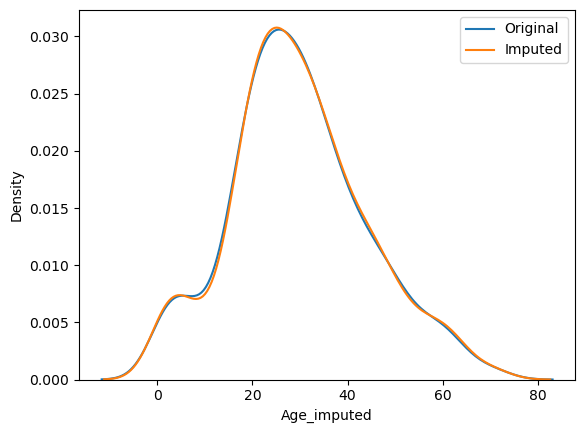

In [42]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

# distibution almost same after applying random imputation

In [43]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.3495133904614
Variance after random imputation:  205.94098503907298


In [44]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,46.363525
Age,71.512440,204.349513,204.349513
Age_imputed,46.363525,204.349513,205.940985


<Axes: >

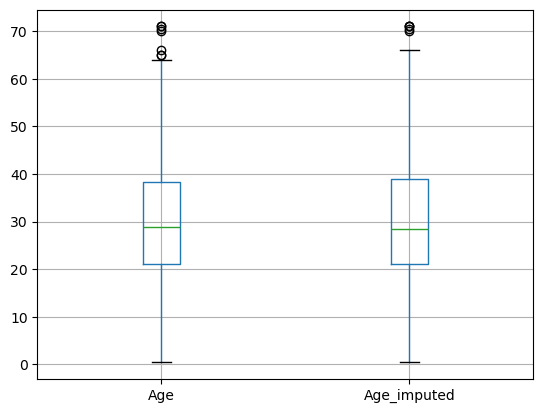

In [45]:
X_train[['Age', 'Age_imputed']].boxplot()

<Axes: >

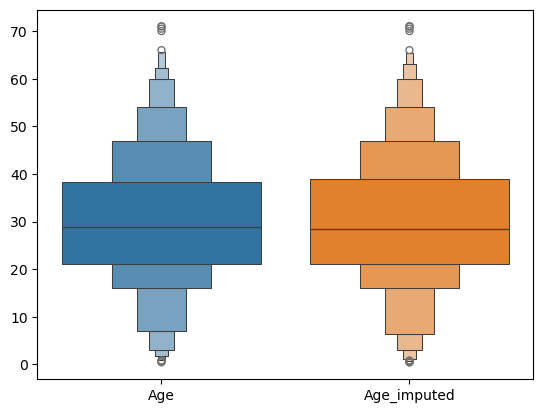

In [48]:
import seaborn as sns
sns.boxenplot(X_train[['Age', 'Age_imputed']])

<Axes: ylabel='Density'>

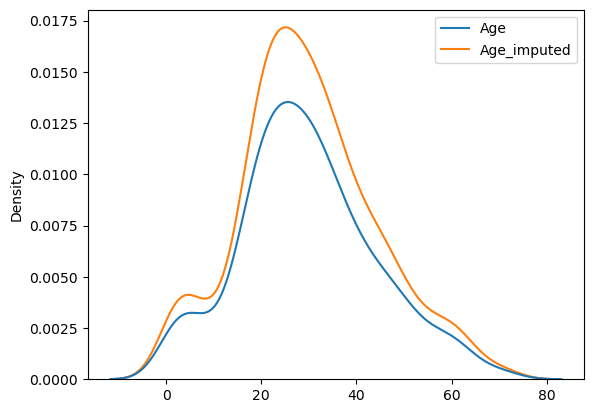

In [49]:

sns.kdeplot(X_train[['Age', 'Age_imputed']])

In [56]:
# sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))